In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
for i in range(3):
    with open(f'StreamingHistory_music_{i}.json','r',encoding="utf8") as f:
        data = pd.json_normalize(json.load(f))
    df = pd.concat([df,data],axis = 0).reset_index(drop = True)

print(df.shape)

(23063, 4)


In [3]:
df.sample(10)

,endTime,artistName,trackName,msPlayed
9275,2023-07-08 17:04,Raftaar,Sheikh Chilli,252000
5297,2023-05-28 10:07,S N U G,Mahogany,19195
19995,2023-12-16 19:24,Destroy Lonely,VETERAN (feat. Ken Carson),173549
9222,2023-07-07 15:28,Bucks Boy,BHAGWADHARI,2516
1363,2023-03-10 17:12,Its AY Remix,Aga Bai Janu Vina Rangach Nahi - DJ Song,181178
6871,2023-06-18 10:40,Vishal-Shekhar,Jhoome Jo Pathaan,0
3122,2023-04-21 14:33,VØJ,Phonk Drift,121417
9703,2023-07-12 07:10,Twin Strings,Baarish Ka Asar,1243
8826,2023-07-05 10:16,Xenoner,Past Lives,124447
7028,2023-06-18 18:09,Paul Engemann,Scarface (Push It To The Limit),70378


In [4]:
# convert endTime column to datetime
# Spotify data is recorded in UTC, I am in IST, UCt is 5.5 hours behind IST 
# Making corresponding correction.
df['endTime'] = pd.to_datetime(df['endTime']) + pd.Timedelta(hours=5.5)


In [5]:
total_listening_hours = sum(df['msPlayed'])/(1000*60*60)
print(f"Total data account for about {total_listening_hours} hours of listening, which are equal to {total_listening_hours/24} days")

Total data account for about 867.5702411111112 hours of listening, which are equal to 36.148760046296296 days


# Listening Pattern in Time Series

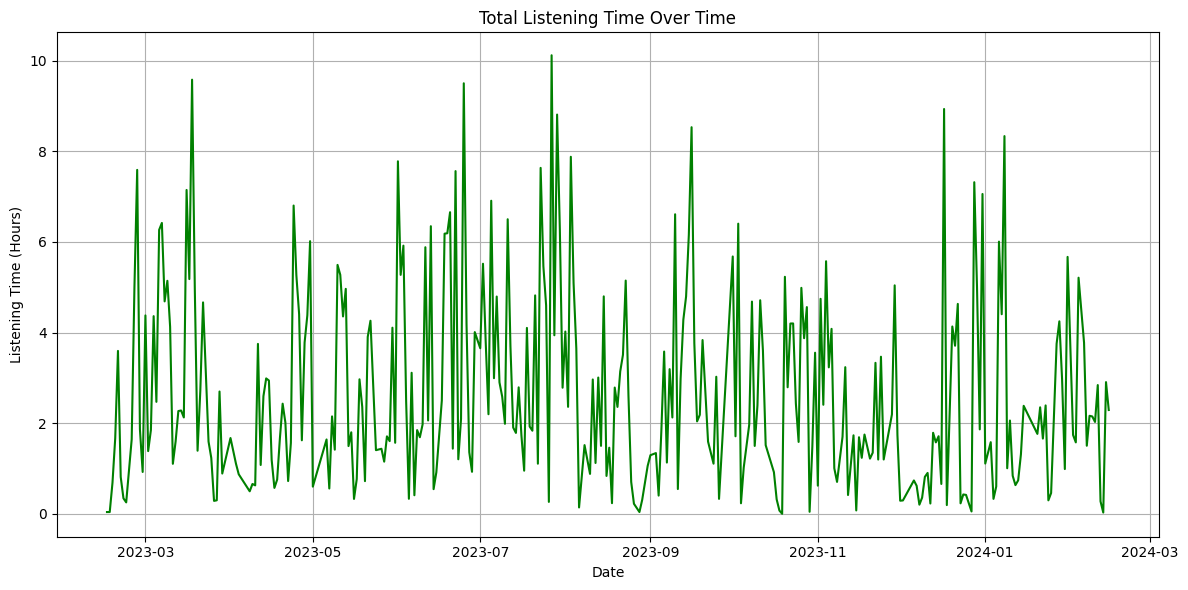

In [6]:
# Extract date from 'endTime' column
df['date'] = df['endTime'].dt.date

# Group the data by date and calculate total listening time for each date
daily_listen_time = df.groupby('date')['msPlayed'].sum() / (1000 * 60 * 60)  # Convert ms to hours

# Plot the time series
plt.figure(figsize=(12, 6))
daily_listen_time.plot(color='green')
plt.xlabel('Date')
plt.ylabel('Listening Time (Hours)')
plt.title('Total Listening Time Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# My Top 10 Most Played Artists of All Time

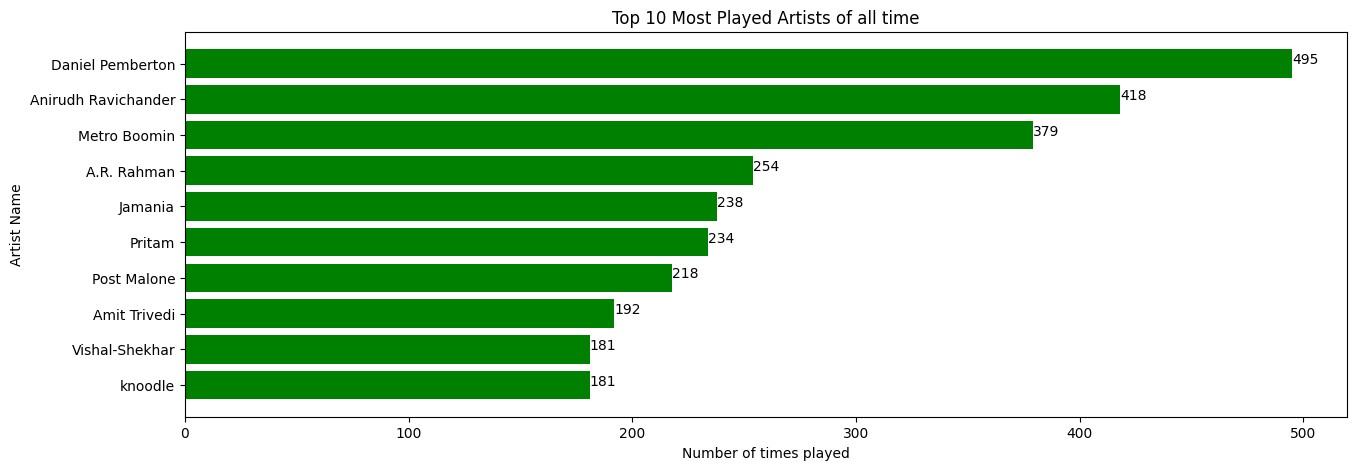

In [7]:
artist_data = df.groupby('artistName').agg({'artistName': 'size', 'msPlayed': 'sum'})
artist_data.columns = ['play_count', 'total_listen_time_ms']
artist_data['total_mintutes_listened'] = artist_data['total_listen_time_ms']/(1000*60)
Most_played_artists = pd.DataFrame(artist_data.sort_values(by = 'play_count',ascending = False)['play_count'])
plt.figure(figsize = (15,5))
plt.barh(Most_played_artists.head(10).index,Most_played_artists.head(10).play_count,color = 'green')
plt.xlabel('Number of times played')
plt.ylabel('Artist Name')
plt.title('Top 10 Most Played Artists of all time')
for index, value in enumerate(Most_played_artists.head(10)['play_count']):
    plt.text(value, index, str(value))

plt.gca().invert_yaxis()  # Invert y-axis to display the artist with the highest play count at the top
plt.show()

# My Top 10 Most Listened Artists of All Time

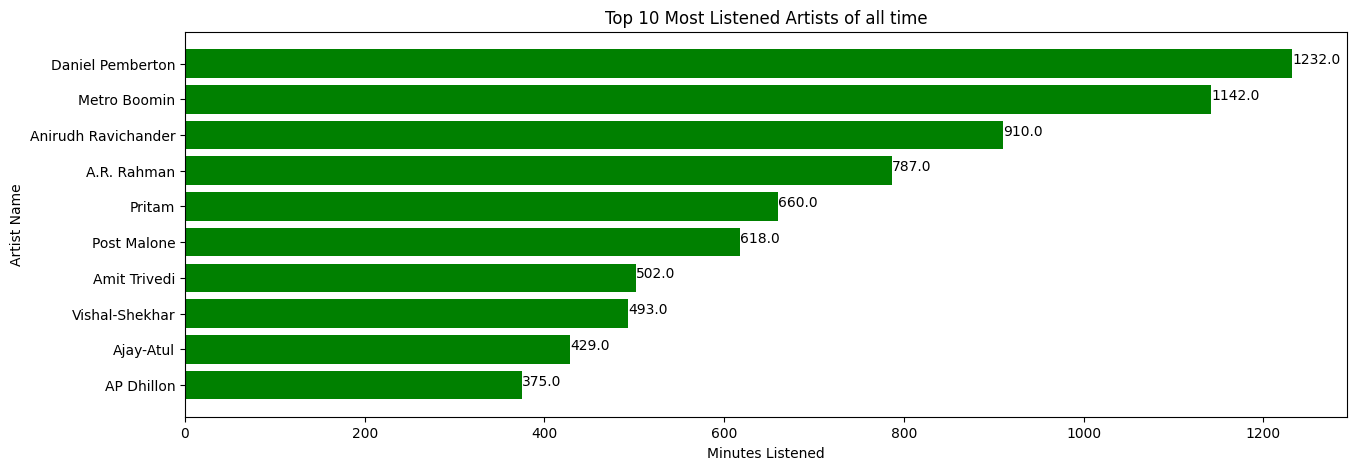

In [8]:
artist_data = df.groupby('artistName').agg({'artistName': 'size', 'msPlayed': 'sum'})
artist_data.columns = ['play_count', 'total_listen_time_ms']
artist_data['total_mintutes_listened'] = round(artist_data['total_listen_time_ms']/(1000*60))
Most_Listened_artists = pd.DataFrame(artist_data.sort_values(by = 'total_mintutes_listened',ascending = False)['total_mintutes_listened'])
plt.figure(figsize = (15,5))
plt.barh(Most_Listened_artists.head(10).index,Most_Listened_artists.head(10).total_mintutes_listened,color = 'green')
plt.xlabel('Minutes Listened')
plt.ylabel('Artist Name')
plt.title('Top 10 Most Listened Artists of all time')
for index, value in enumerate(Most_Listened_artists.head(10)['total_mintutes_listened']):
    plt.text(value, index, str(value))

plt.gca().invert_yaxis()  # Invert y-axis to display the artist with the highest play count at the top
plt.show()

# My Top 10 Most Played Tracks of All Time

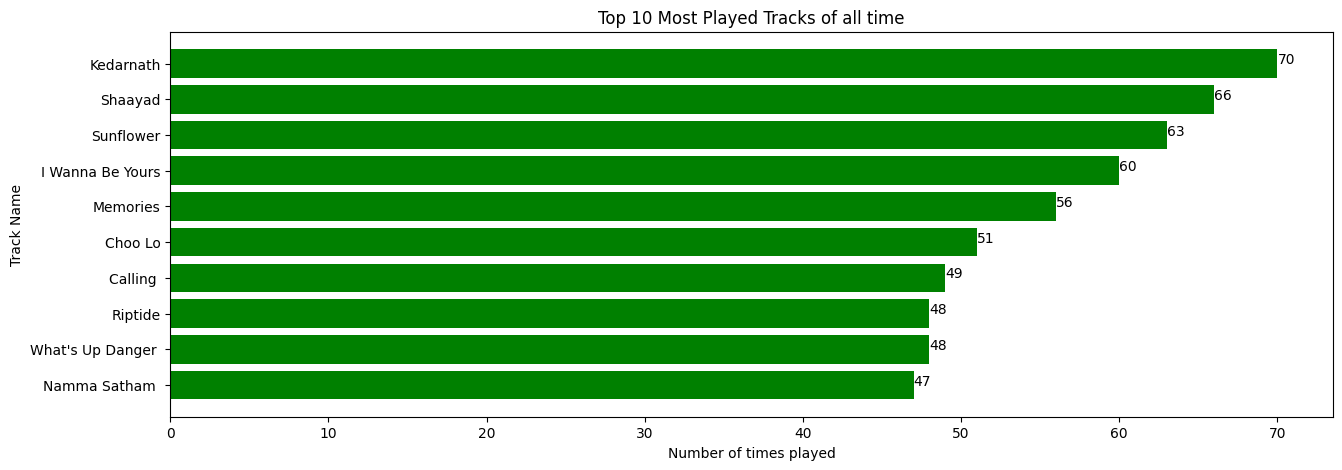

In [9]:
track_data = df.groupby('trackName').agg({'trackName': 'size', 'msPlayed': 'sum'})
track_data.columns = ['play_count', 'total_listen_time_ms']
track_data['total_mintutes_listened'] = artist_data['total_listen_time_ms']/(1000*60)
Most_played_tracks = pd.DataFrame(track_data.sort_values(by = 'play_count',ascending = False)['play_count'])
Most_played_tracks.index = map(lambda x: x.split('(')[0] , Most_played_tracks.index)
plt.figure(figsize = (15,5))
plt.barh(Most_played_tracks.head(10).index,Most_played_tracks.head(10).play_count,color = 'green')
plt.xlabel('Number of times played')
plt.ylabel('Track Name')
plt.title('Top 10 Most Played Tracks of all time')
for index, value in enumerate(Most_played_tracks.head(10)['play_count']):
    plt.text(value, index, str(value))

plt.gca().invert_yaxis()  # Invert y-axis to display the artist with the highest play count at the top
plt.show()

# My Top 10 Most Listened Tracks of All Time

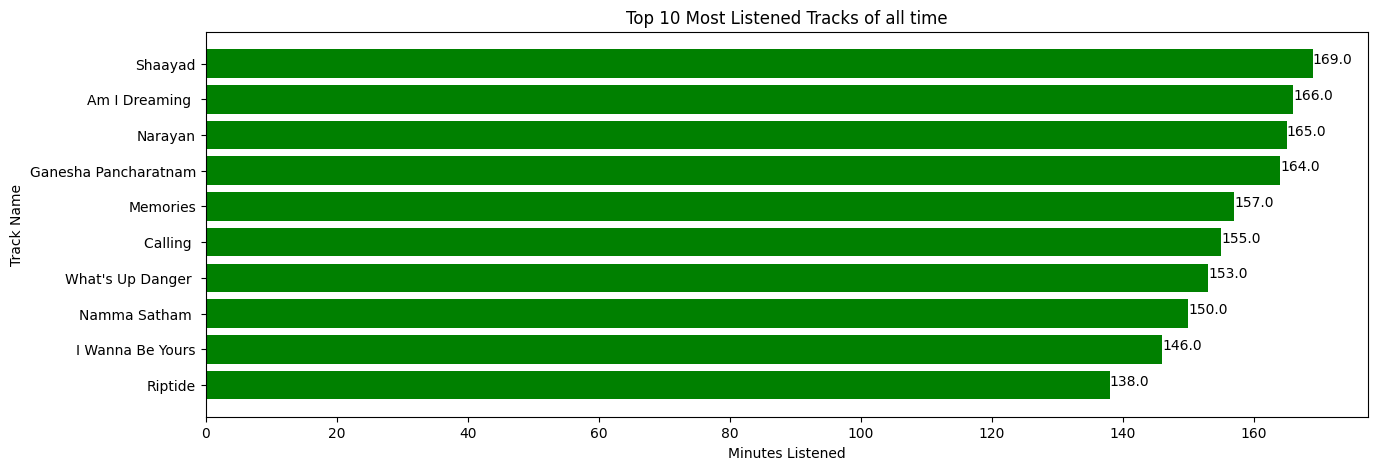

In [10]:
track_data = df.groupby('trackName').agg({'trackName': 'size', 'msPlayed': 'sum'})
track_data.columns = ['play_count', 'total_listen_time_ms']
track_data['total_mintutes_listened'] = round(track_data['total_listen_time_ms']/(1000*60))
Most_played_tracks = pd.DataFrame(track_data.sort_values(by = 'total_mintutes_listened',ascending = False)['total_mintutes_listened'])
Most_played_tracks.index = map(lambda x: x.split('(')[0] , Most_played_tracks.index)
plt.figure(figsize = (15,5))
plt.barh(Most_played_tracks.head(10).index,Most_played_tracks.head(10).total_mintutes_listened,color = 'green')
plt.xlabel('Minutes Listened')
plt.ylabel('Track Name')
plt.title('Top 10 Most Listened Tracks of all time')
for index, value in enumerate(Most_played_tracks.head(10)['total_mintutes_listened']):
    plt.text(value, index, str(value))

plt.gca().invert_yaxis()  # Invert y-axis to display the artist with the highest play count at the top
plt.show()

# Hourly Listening Time

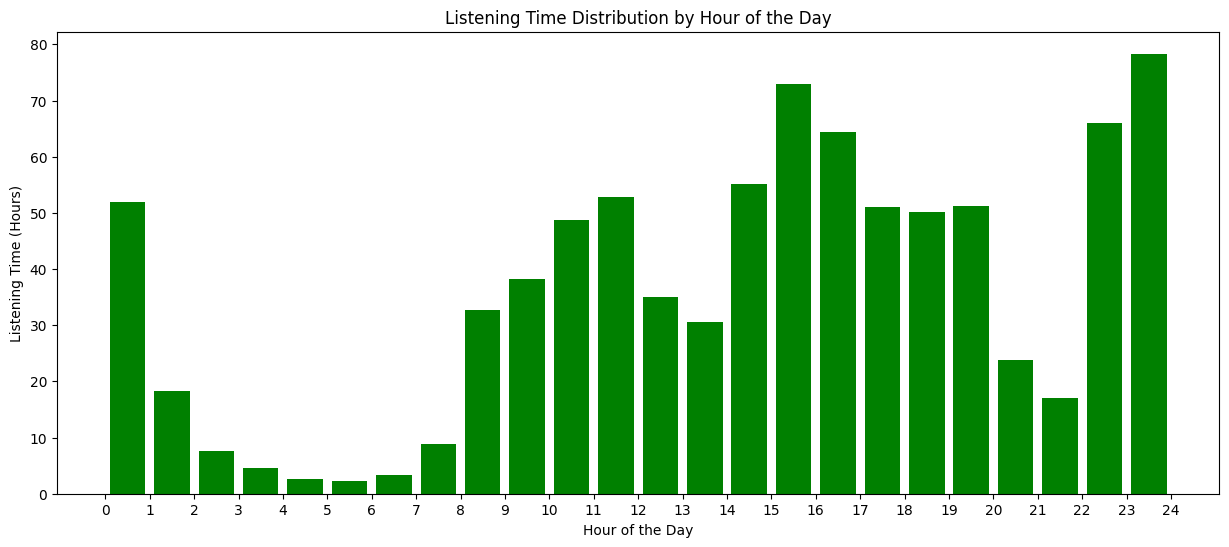

In [23]:

df['hour'] = df['endTime'].dt.hour
# Group the data by hour and calculate total listening time for each hour
hourly_listen_time = df.groupby('hour')['msPlayed'].sum() / (1000 * 60 * 60)  # Convert ms to hours

# Plot the results with adjusted x-axis ticks
plt.figure(figsize=(15, 6))
bars = plt.bar(hourly_listen_time.index, hourly_listen_time, width=0.8, color='green')

# Adjust x-axis ticks to be in between the numbers
plt.xticks(np.arange(25) - 0.5, range(25))

plt.xlabel('Hour of the Day')
plt.ylabel('Listening Time (Hours)')
plt.title('Listening Time Distribution by Hour of the Day')
plt.grid(False)
plt.show()

# Weekly Listening Pattern

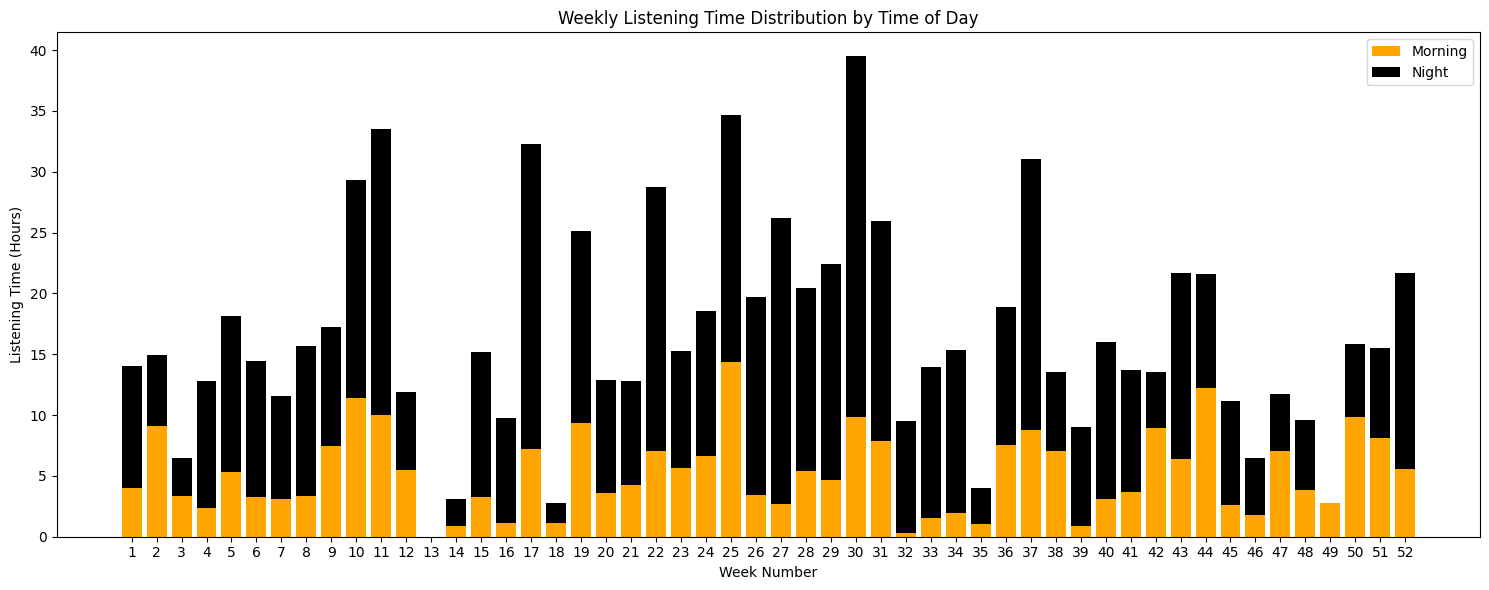

In [12]:
def categorize_time(hour):
    if hour < 12:
        return 'Morning'
    else:
        return 'Night'

# Extract the week number from the 'endTime' column
df['week_number'] = df['endTime'].dt.isocalendar().week

# Extract the hour component from the 'endTime' column
df['hour'] = df['endTime'].dt.hour

# Categorize each listening session as morning or night
df['time_of_day'] = df['hour'].apply(categorize_time)

# Group the data by week number and time of day, and calculate total listening time for each category
weekly_listen_time_split = df.groupby(['week_number', 'time_of_day'])['msPlayed'].sum() / (1000 * 60 * 60)  # Convert ms to hours

# Plot the results
plt.figure(figsize=(15, 6))

# Plot morning listening time
plt.bar(weekly_listen_time_split.unstack().index, weekly_listen_time_split.unstack()['Morning'], color='orange', label='Morning')

# Plot night listening time on top of morning listening time
plt.bar(weekly_listen_time_split.unstack().index, weekly_listen_time_split.unstack()['Night'], bottom=weekly_listen_time_split.unstack()['Morning'], color='black', label='Night')

plt.xlabel('Week Number')
plt.ylabel('Listening Time (Hours)')
plt.title('Weekly Listening Time Distribution by Time of Day')
plt.grid(False)
plt.xticks(range(1, 53))
plt.legend()
plt.tight_layout()
plt.show()

# Monthly Listening Pattern

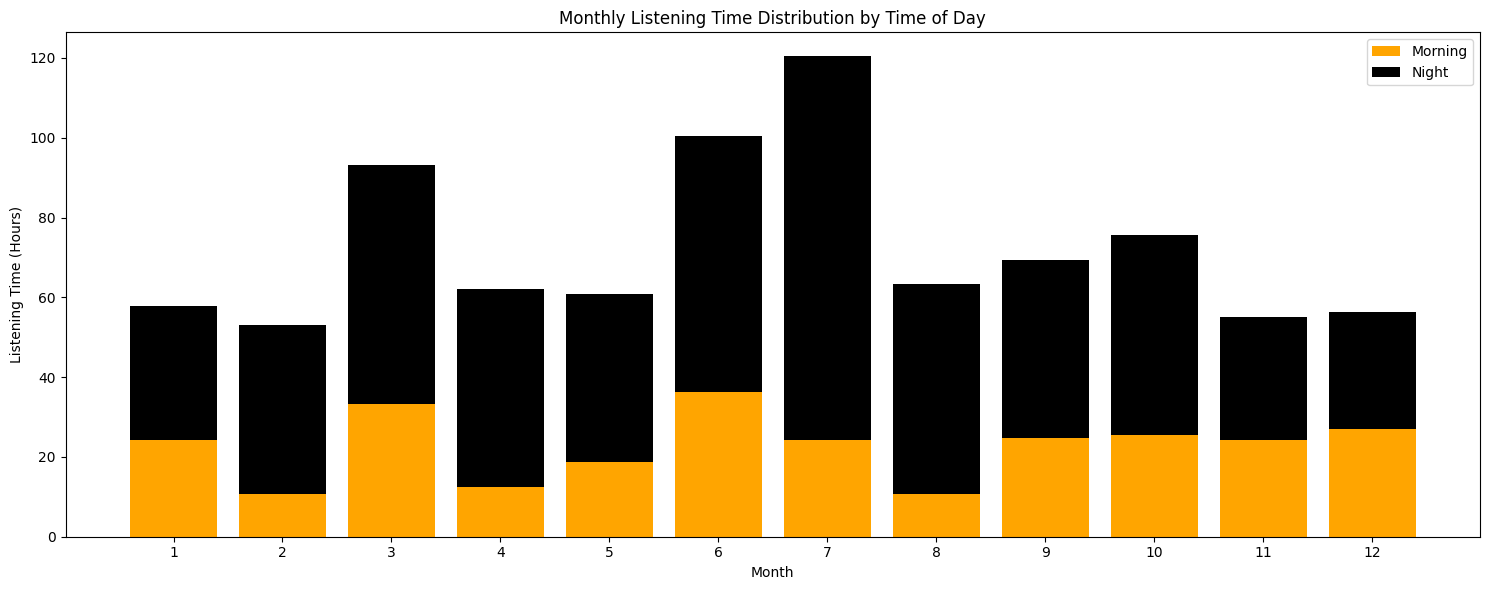

In [13]:
df['month'] = df['endTime'].dt.month

# Group the data by month and time of day, and calculate total listening time for each category
monthly_listen_time_split = df.groupby(['month', 'time_of_day'])['msPlayed'].sum() / (1000 * 60 * 60)  # Convert ms to hours

# Plot the results
plt.figure(figsize=(15, 6))

# Plot morning listening time
plt.bar(monthly_listen_time_split.unstack().index, monthly_listen_time_split.unstack()['Morning'], color='orange', label='Morning')

# Plot night listening time on top of morning listening time
plt.bar(monthly_listen_time_split.unstack().index, monthly_listen_time_split.unstack()['Night'], bottom=monthly_listen_time_split.unstack()['Morning'], color='black', label='Night')

plt.xlabel('Month')
plt.ylabel('Listening Time (Hours)')
plt.title('Monthly Listening Time Distribution by Time of Day')
plt.grid(False)
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()

# Listening Pattern as per Date

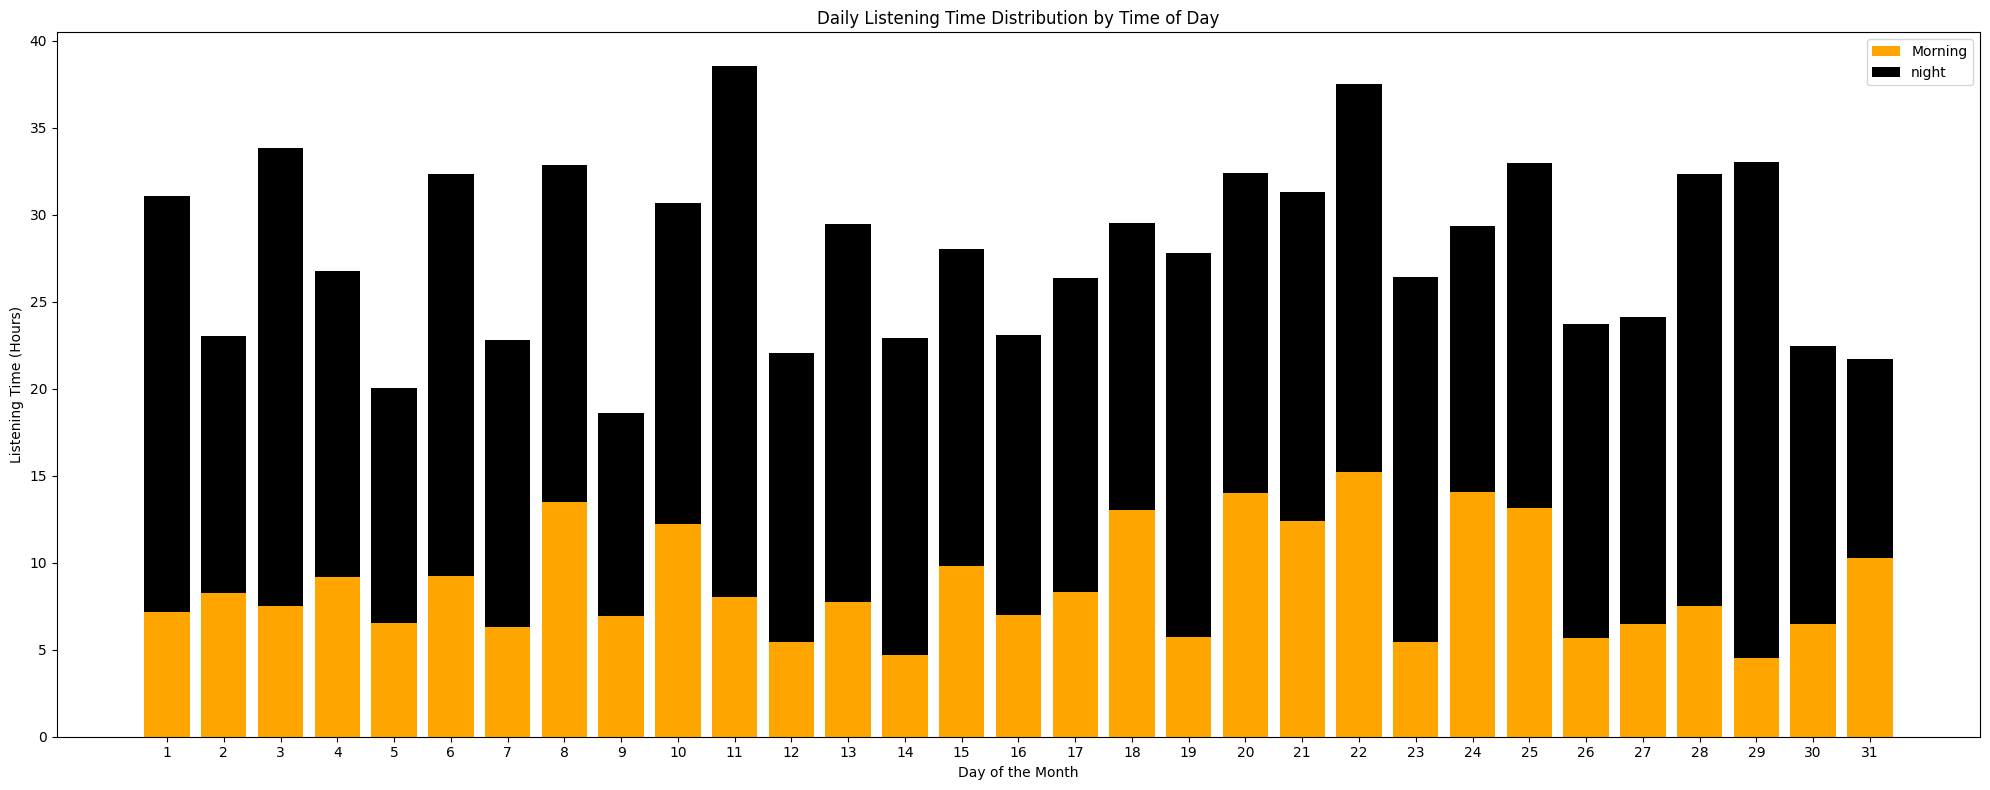

In [14]:
# Extract the day of the month from the 'endTime' column
df['day_of_month'] = df['endTime'].dt.day

# Group the data by day of the month and time of day, and calculate total listening time for each category
daily_listen_time_split = df.groupby(['day_of_month', 'time_of_day'])['msPlayed'].sum() / (1000 * 60 * 60)  # Convert ms to hours

# Plot the results
plt.figure(figsize=(20, 8))

# Plot morning listening time
plt.bar(daily_listen_time_split.unstack().index, daily_listen_time_split.unstack()['Morning'], color='orange', label='Morning')

# Plot night listening time on top of morning listening time
plt.bar(daily_listen_time_split.unstack().index, daily_listen_time_split.unstack()['Night'], bottom=daily_listen_time_split.unstack()['Morning'], color='black', label='night')

plt.xlabel('Day of the Month')
plt.ylabel('Listening Time (Hours)')
plt.title('Daily Listening Time Distribution by Time of Day')
plt.grid(False)
plt.xticks(range(1, max(df['day_of_month']) + 1))
plt.legend()
plt.tight_layout()
plt.show()

# Podcasts

In [22]:
with open(f'StreamingHistory_podcast_0.json','r',encoding="utf8") as f:
        podcasts = pd.json_normalize(json.load(f))
print(podcasts.shape)
podcasts.sample(5)

(206, 4)


,endTime,podcastName,episodeName,msPlayed
162,2024-01-22 12:00,The Mel Robbins Podcast,Don’t Quit: The Reminder You Need to Hear When...,2456058
119,2023-12-17 09:13,How to Keep Time,How to Make Small Talk,1784181
153,2024-01-05 08:34,Snap Judgment,The Stormy Night,3122663
83,2023-11-10 06:10,Julian Dorey Podcast,😱 [VIDEO] - 36 Days Alone Inside Deadliest Afr...,922006
59,2023-07-07 07:42,Motivation Daily by Motiversity,YOU CAN DO IT - New Motivational Speech Compil...,1238908


In [16]:
podcasts['endTime'] = pd.to_datetime(podcasts['endTime']) + pd.Timedelta(hours=5.5)

In [17]:
total_listening_pod_hours = sum(podcasts['msPlayed'])/(1000*60*60)
print(f"Total data account for about {total_listening_pod_hours} hours of listening, which are equal to {total_listening_pod_hours/24} days")

Total data account for about 72.03039083333333 hours of listening, which are equal to 3.001266284722222 days


In [18]:
top_podcasts = pd.DataFrame(podcasts.groupby('podcastName')['msPlayed'].sum().sort_values(ascending=False))

In [19]:
top_podcasts.columns = [ 'total_listen_time_ms']
top_podcasts['total_mintutes_listened'] = round(top_podcasts['total_listen_time_ms']/(1000*60))
top_podcasts.head(10)

,total_listen_time_ms,total_mintutes_listened
podcastName,,
The Joe Rogan Experience,49135154,819.0
Lex Fridman Podcast,29842500,497.0
Don’t Work for Money: Books That Help You Take Care of Your Future,29070002,485.0
The Mel Robbins Podcast,28146815,469.0
Julian Dorey Podcast,15680271,261.0
Science Vs,12794668,213.0
WTF with Marc Maron Podcast,11424328,190.0
Heavyweight,8699160,145.0
WTF is with Nikhil Kamath,7872383,131.0


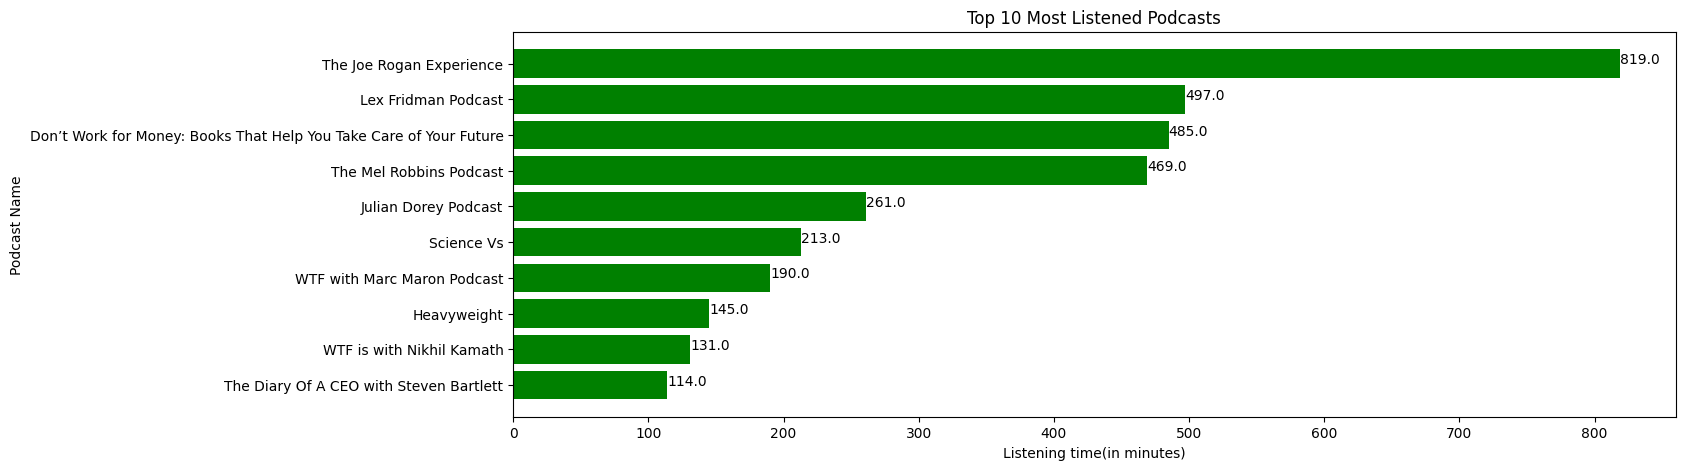

In [20]:
plt.figure(figsize = (15,5))
plt.barh(top_podcasts.head(10).index,top_podcasts.head(10).total_mintutes_listened,color = 'green')
plt.xlabel('Listening time(in minutes)')
plt.ylabel('Podcast Name')
plt.title('Top 10 Most Listened Podcasts')
for index, value in enumerate(top_podcasts.head(10)['total_mintutes_listened']):
    plt.text(value, index, str(value))

plt.gca().invert_yaxis()  # Invert y-axis to display the artist with the highest play count at the top
plt.show()

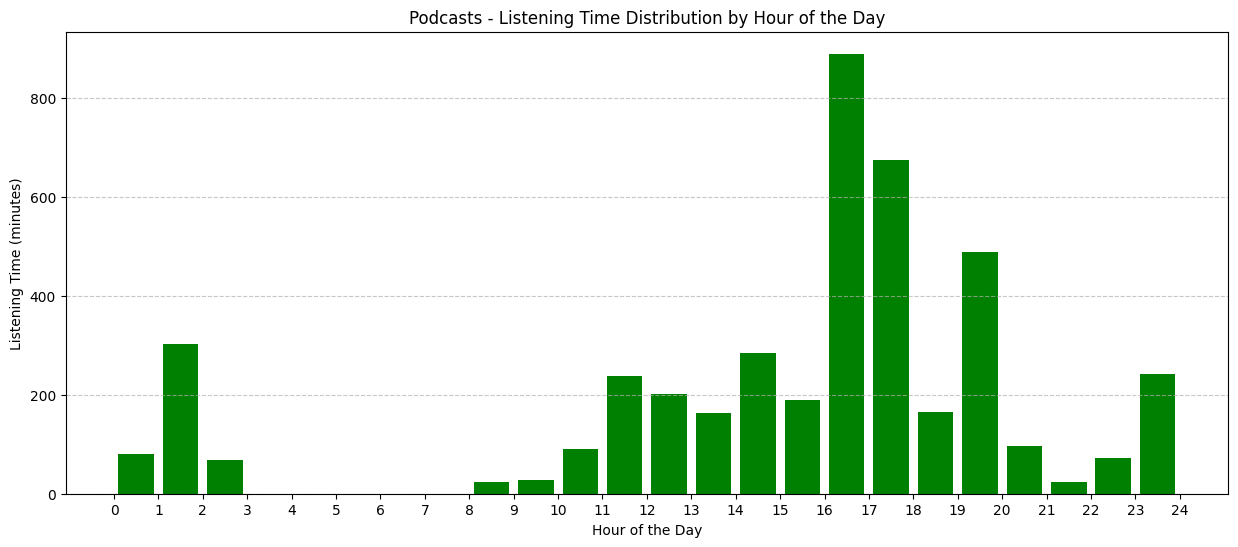

In [21]:
podcasts['hour'] = podcasts['endTime'].dt.hour
# Group the data by hour and calculate total listening time for each hour
hourly_listen_time = podcasts.groupby('hour')['msPlayed'].sum() / (1000 * 60 )  # Convert ms to minutes

# Plot the results with adjusted x-axis ticks
plt.figure(figsize=(15, 6))
bars = plt.bar(hourly_listen_time.index, hourly_listen_time, width=0.8, color='green')

# Adjust x-axis ticks to be in between the numbers
plt.xticks(np.arange(25) - 0.5, range(25))

plt.xlabel('Hour of the Day')
plt.ylabel('Listening Time (minutes)')
plt.title('Podcasts - Listening Time Distribution by Hour of the Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()